# RABBITS VS SHEEPS
##### ALBERTO FACCHIN 

____________________________________________________________________________________________________________________________________________________________

Importazione librerie necessarie

In [1]:
pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importazione delle librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sympy
from sympy import *
from numpy.linalg import eig
from scipy.integrate import odeint

Funzione che restituisce le singole equazioni della ODE

In [2]:
def f(x, y, a, b):
    dxdt = x * (3 - a * x - b * y)
    dydt = y * (2 - x - y)
    return np.array([dxdt, dydt])

Funzione per la determinazione dei punti fissi e la loro stabilità

In [3]:
def puntiFissiTot(a, b):

    # Calcolo punti fissi
    def puntiFissi(a, b):
        x, y = symbols('x, y')
        eq1 = Eq(x * (3 - a*x - b*y), 0)
        eq2 = Eq(y * (2 - x - y), 0)
        sol = solve([eq1, eq2], [x, y])

        # Plot dei punti d'equilibrio
        for i, j in sol:
            plt.plot(i, j, marker="o", markersize=4, color="black")
        return sol

    # Calcolo la matrice Jacobiana
    def jacobian(variables):
        x, y = variables
        return [[3 - 2*a*x - b*y, -b*x], [-y, 2 - x - 2*y]]

    print(puntiFissi(a, b))  # Stampa i punti fissi

    # Calcolo le jacobiane nei punti fissi
    jacobians = [jacobian(point) for point in puntiFissi(a, b)]
    print(jacobians)

    # Calcolo gli autovalori e autovettori
    for jacobian in jacobians:
        eigenvalues, eigenvectors = eig(np.array(jacobian, dtype=float))

        if (eigenvalues[0] < 0 < eigenvalues[1]) or (eigenvalues[0] > 0 > eigenvalues[1]):
            print(eigenvectors[0], eigenvectors[1])


Funzione per tracciare le isocline

In [4]:
def isocline(a, b):
    x1 = np.linspace(-1, 5)  # Linspace per generare punti
    y2 = np.linspace(-1, 5)
    y1 = -a*x1 + 3  # Prima eq.
    x2 = y2*0  # x=0
    y3 = -x1+2  # Seconda eq.
    y4 = x1*0  # y=0

    plt.ylim(-1, 5)
    plt.xlim(-1, 5)
    plt.plot(x1, y1, "r--", label="x-isocline")
    plt.plot(x2, y2, "r--")
    plt.plot(x1, y3, "g--", label="y-isocline")
    plt.plot(x1, y4, "g--")
    plt.plot(x1, y4, "g--")
    plt.legend(loc="upper right")

    # Tracciare l'orbita chiusa intorno al punto fisso
    #t = np.linspace(0, 2*np.pi, 65)
    #xc = 1 + 0.3 * np.cos(t)
    #yc = 1 + 0.3 * np.sin(t)
    #plt.plot(xc,yc, "k--")

Funzione per plottare i campi vettoriali al variare di a e b

In [5]:
def plotdf(a_list, b_list, axs = None):
    xran = [-1, 5]
    yran = [-1, 5]
    grid = [21, 21]
    for i, ax in enumerate(axs.flat):
        a = a_list[i]
        b = b_list[i]

        x = np.linspace(xran[0], xran[1], grid[0])
        y = np.linspace(yran[0], yran[1], grid[1])

        X, Y = np.meshgrid(x, y)  # Crea la griglia
        DX, DY = f(X, Y, a, b)

        M = (np.hypot(DX, DY))  # Normalizza l'andamento della crescita
        M[M == 0] = 1.  # In caso di divisione per 0
        DX = DX / M  # Normalizza ogni freccia del campo
        DY = DY / M

        ax.quiver(X, Y, DX, DY, pivot='mid', color='darkorange')  # Plotta la griglia
        ax.set_title(f'a={a}, b={b}')

Funzione per ottenere un singolo campo vettoriale

In [6]:
def plotdf_1(a, b):
    xran = [-1, 5]
    yran = [-1, 5]
    grid = [21, 21]

    x = np.linspace(xran[0], xran[1], grid[0])
    y = np.linspace(yran[0], yran[1], grid[1])

    X, Y = np.meshgrid(x, y)  # Crea la griglia
    DX, DY = f(X, Y, a, b)

    M = (np.hypot(DX, DY))  # Normalizza l'andamento della crescita
    M[M == 0] = 1.  # In caso di divisione per 0
    DX = DX / M  # Normalizza ogni freccia del campo
    DY = DY / M

    fig, ax = plt.subplots()
    ax.quiver(X, Y, DX, DY, pivot='mid', color='darkorange')  # Plotta la griglia
    ax.set_title(f'Campo vettoriale con a={a}, b={b}')
    fig.show()

Piano di fase

In [69]:
def pianoFase(a, b):
    # Punti fissi
    fixed_points = np.array([[0., 0.], [0., 2.], [3/a, 0.], [(3 - 2*b)/(a - b), (2*a - 3)/(a - b)]])

    x = np.linspace(0, 3, 10)  # Generiamo punti
    y = np.linspace(0, 3, 10)
    X, Y = np.meshgrid(x, y)  # Generiamo la griglia

    # Funzione
    Xdot = X * (3 - a * X - b * Y)
    Ydot = Y * (2 - X - Y)

    fig, ax = plt.subplots()
    plt.title(f"Piano di fase con a={a} e b={b}")
    plt.ylabel("y")
    plt.xlabel("x")

    # Asse X e Y
    x1 = np.linspace(0, 3)  # Linspace per generare punti
    y2 = np.linspace(0, 3)
    x2 = y2 * 0  # x=0
    y4 = x1 * 0  # y=0
    plt.plot(x1, y4, color="k")
    plt.plot(x2, y2, color="k")

    ax.streamplot(X, Y, Xdot, Ydot, density = 0.8)
    ax.scatter(*fixed_points.T, color="r")
    fig.show()

Inizializzazione dei parametri

In [60]:
a = 2
b = 1

a_list = [2, 1, 1, 3]  # Parametri a e b per variare
b_list = [1, 2, 3, 1]

Plotta i 4 campi vettoriali

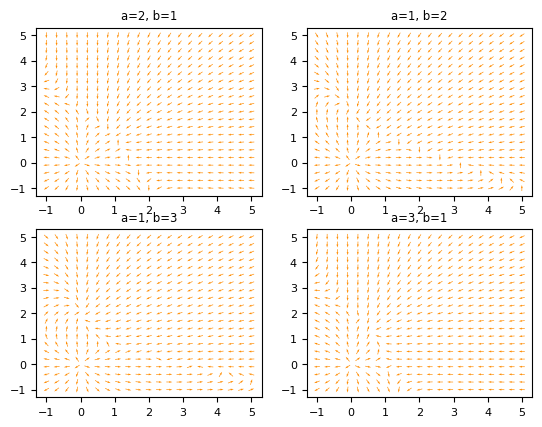

In [62]:
fig, axs = plt.subplots(2, 2)
plt.rcParams['figure.dpi'] = 100  # Impostiamo graficamente i plot
plt.rcParams['font.size'] = 7

plotdf(a_list, b_list, axs)  # Plotta 4 campi vettoriali

Analisi con a = 2 e b = 1

C:\Users\albyf\AppData\Local\Temp\ipykernel_12640\73936678.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[(0, 0), (0, 2), (1, 1), (3/2, 0)]
[[[3, 0], [0, 2]], [[1, 0], [-2, -2]], [[-2, -1], [-1, -1]], [[-3, -3/2], [0, 1/2]]]
[0.         0.83205029] [ 1.        -0.5547002]
[ 1.        -0.3939193] [0.         0.91914503]


C:\Users\albyf\AppData\Local\Temp\ipykernel_12640\1490099423.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


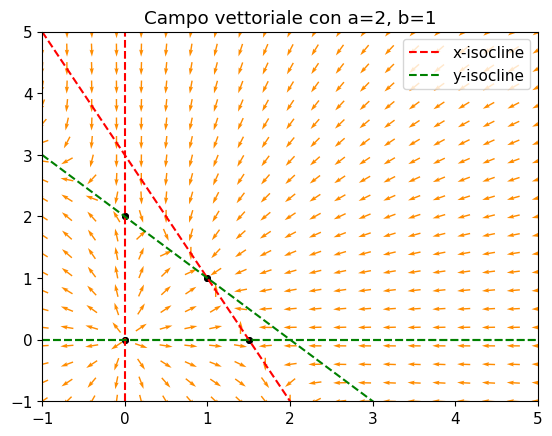

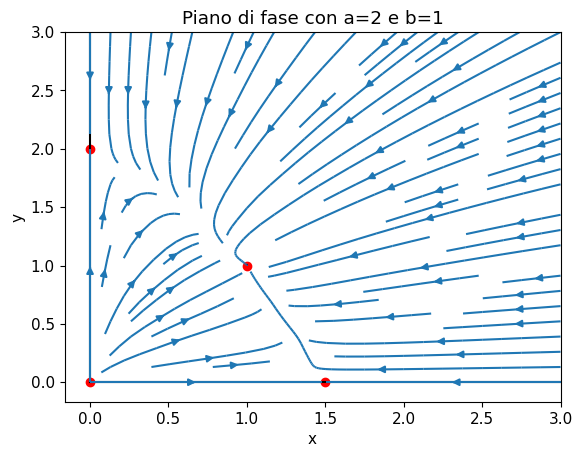

In [70]:
plt.rcParams['figure.dpi'] = 100  # Impostiamo graficamente i plot
plt.rcParams['font.size'] = 11

plotdf_1(a, b)
puntiFissiTot(a, b)  # Calcola i punti fissi
isocline(a, b)  # Traccia graficamente le isocline
pianoFase(a, b)  # Disegna il piano di fase

Analisi con a = 1 e b = 2

C:\Users\albyf\AppData\Local\Temp\ipykernel_12640\73936678.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[(0, 0), (0, 2), (1, 1), (3, 0)]
[[[3, 0], [0, 2]], [[-1, 0], [-2, -2]], [[-1, -2], [-1, -1]], [[-3, -6], [0, -1]]]
[0.81649658 0.81649658] [-0.57735027  0.57735027]


C:\Users\albyf\AppData\Local\Temp\ipykernel_12640\1490099423.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


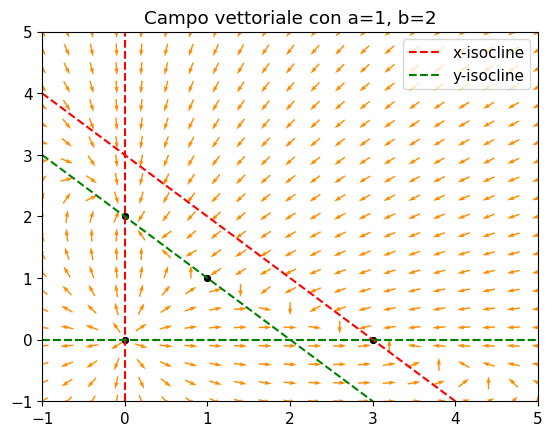

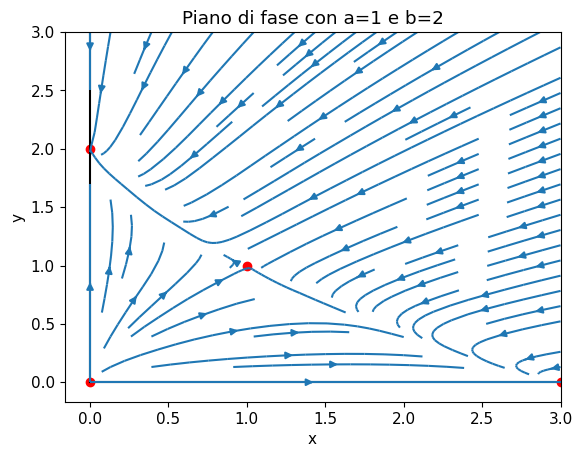

In [71]:
plt.rcParams['figure.dpi'] = 100  # Impostiamo graficamente i plot
plt.rcParams['font.size'] = 11

plotdf_1(a_list[1], b_list[1])
puntiFissiTot(a_list[1], b_list[1])  # Calcola i punti fissi
isocline(a_list[1], b_list[1])  # Traccia graficamente le isocline
pianoFase(a_list[1], b_list[1])  # Disegna il piano di fase

Analisi con a = 1 e b = 3

C:\Users\albyf\AppData\Local\Temp\ipykernel_12640\73936678.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[(0, 0), (0, 2), (3/2, 1/2), (3, 0)]
[[[3, 0], [0, 2]], [[-3, 0], [-2, -2]], [[-3/2, -9/2], [-1/2, -1/2]], [[-3, -9], [0, -1]]]
[-0.97233143  0.90763558] [-0.23360562 -0.41975903]


C:\Users\albyf\AppData\Local\Temp\ipykernel_12640\1490099423.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


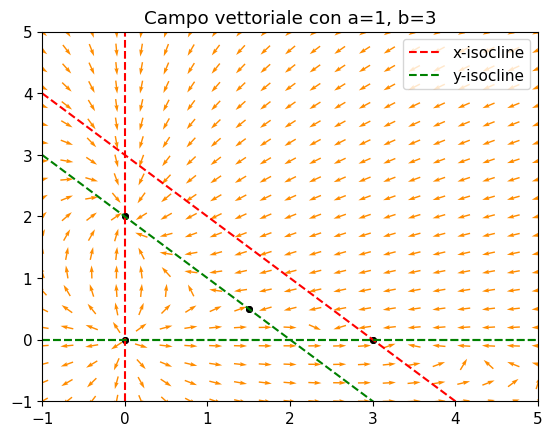

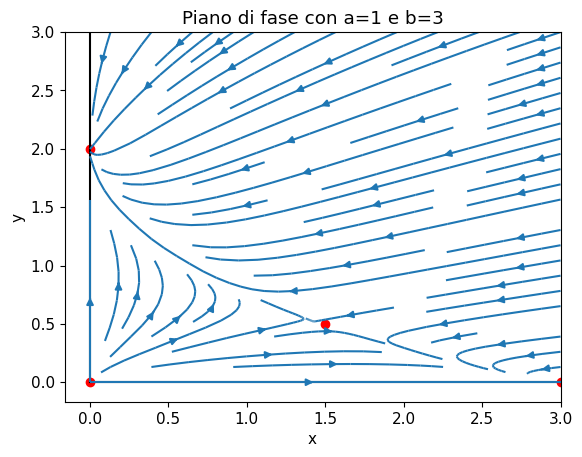

In [72]:
plt.rcParams['figure.dpi'] = 100  # Impostiamo graficamente i plot
plt.rcParams['font.size'] = 11

plotdf_1(a_list[2], b_list[2])
puntiFissiTot(a_list[2], b_list[2])  # Calcola i punti fissi
isocline(a_list[2], b_list[2])  # Traccia graficamente le isocline
pianoFase(a_list[2], b_list[2])  # Disegna il piano di fase

Analisi con a = 3 e b = 1

C:\Users\albyf\AppData\Local\Temp\ipykernel_12640\73936678.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


[(0, 0), (0, 2), (1/2, 3/2), (1, 0)]
[[[3, 0], [0, 2]], [[1, 0], [-2, -2]], [[-3/2, -1/2], [-3/2, -3/2]], [[-3, -1], [0, 1]]]
[0.         0.83205029] [ 1.        -0.5547002]
[ 1.         -0.24253563] [0.        0.9701425]


C:\Users\albyf\AppData\Local\Temp\ipykernel_12640\1490099423.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


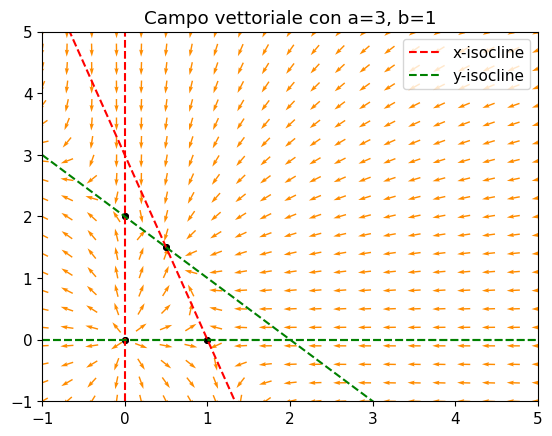

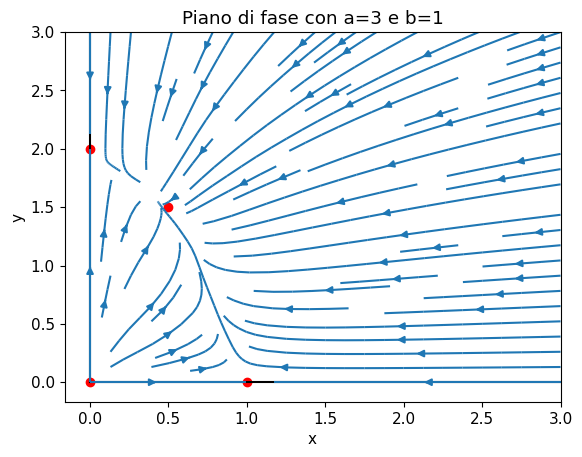

In [73]:
plt.rcParams['figure.dpi'] = 100  # Impostiamo graficamente i plot
plt.rcParams['font.size'] = 11

plotdf_1(a_list[3], b_list[3])
puntiFissiTot(a_list[3], b_list[3])  # Calcola i punti fissi
isocline(a_list[3], b_list[3])  # Traccia graficamente le isocline
pianoFase(a_list[3], b_list[3])  # Disegna il piano di fase

### Analisi delle soluzioni

Spezziamo il sistema

In [91]:
def fx(x, y, a, b):
    return x*(3 - a*x - b*y)

def fy(x, y):
    return y*(2 - x - y)

Algoritmo di Eulero

In [97]:
def eulero(x_0, y_0, delta_t, n_steps, fx, fy):
    x_arr = np.zeros(n_steps + 1)
    y_arr = np.zeros(n_steps + 1)
    
    x_arr[0] = x_0
    y_arr[0] = y_0
    
    for i in range(1, n_steps + 1):
        x_arr[i] = x_arr[i - 1] + fx(x_arr[i - 1], y_arr[i - 1])*delta_t
        y_arr[i] = y_arr[i - 1] + fy(x_arr[i - 1], y_arr[i - 1])*delta_t
    return (x_arr, y_arr)

Algoritmo di Eulero modificato

In [101]:
def eulero_mod(x_0, y_0, delta_t, n_steps, fx, fy):
    x_arr = np.zeros(n_steps + 1)
    y_arr = np.zeros(n_steps + 1)
    
    x_arr[0] = x_0
    y_arr[0] = y_0
    
    for i in range(1, n_steps + 1):
        x_tilde = x_arr[i - 1] + fx(x_arr[i - 1], y_arr[i - 1])*delta_t
        y_tilde = y_arr[i - 1] + fy(x_arr[i - 1], y_arr[i - 1])*delta_t
        x_arr[i] = x_arr[i - 1] + 0.5*(fx(x_arr[i - 1], y_arr[i - 1]) + fx(x_tilde, y_tilde))*delta_t
        y_arr[i] = y_arr[i - 1] + 0.5*(fy(x_arr[i - 1], y_arr[i - 1]) + fy(x_tilde, y_tilde))*delta_t
    return (x_arr, y_arr)

Algoritmo di Runge Kutta 4

In [102]:
def rk4(x_0, y_0, delta_t, n_steps, fx, fy):
    x_arr = np.zeros(n_steps + 1)
    y_arr = np.zeros(n_steps + 1)
    
    x_arr[0] = x_0
    y_arr[0] = y_0
    
    for i in range(1, n_steps + 1):
        k1x = fx(x_arr[i - 1], y_arr[i - 1])*delta_t
        k1y = fy(x_arr[i - 1], y_arr[i - 1])*delta_t
        k2x = fx(x_arr[i - 1] + 0.5*k1x, y_arr[i - 1] + 0.5*k1y)*delta_t
        k2y = fy(x_arr[i - 1] + 0.5*k1x, y_arr[i - 1] + 0.5*k1y)*delta_t
        k3x = fx(x_arr[i - 1] + 0.5*k2x, y_arr[i - 1] + 0.5*k2y)*delta_t
        k3y = fy(x_arr[i - 1] + 0.5*k2x, y_arr[i - 1] + 0.5*k2y)*delta_t
        k4x = fx(x_arr[i - 1] + k3x, y_arr[i - 1] + k3y)*delta_t
        k4y = fy(x_arr[i - 1] + k3x, y_arr[i - 1] + k3y)*delta_t
        x_arr[i] = x_arr[i - 1] + 1/6*(k1x + 2*k2x + 2*k3x + k4x)
        y_arr[i] = y_arr[i - 1] + 1/6*(k1y + 2*k2y + 2*k3y + k4y)
    return (x_arr, y_arr)

Definizione dei parametri iniziali

In [149]:
# definizione parametri iniziali
x_0 = 0.1
y_0 = 0.1
delta_t = 0.01
n_steps = 200
initial_populations = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 3, 5, 10]

Soluzione numerica con a = 2 e b = 1

Text(0, 0.5, '$ y $')

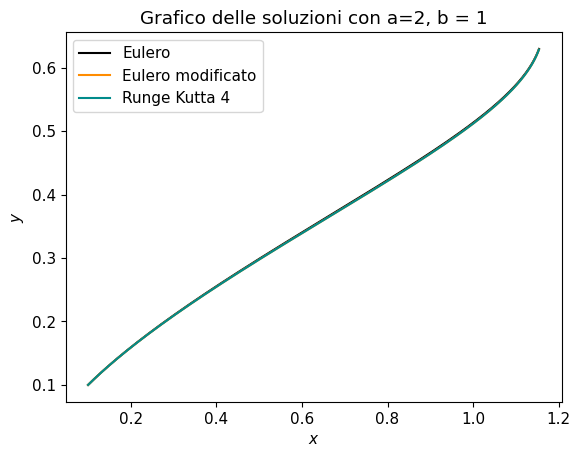

In [146]:
a = 2
b = 1

(x_arr, y_arr) = eulero(x_0, y_0, delta_t, n_steps, lambda x, y: fx(x, y, a, b), lambda x, y: fy(x, y))
plt.plot(x_arr, y_arr, label = "Eulero", c = "k")

(x_arr, y_arr) = eulero_mod(x_0, y_0, delta_t, n_steps, lambda x, y: fx(x, y, a, b), lambda x, y: fy(x, y))
plt.plot(x_arr, y_arr, label = "Eulero modificato", c = "darkorange")

(x_arr, y_arr) = rk4(x_0, y_0, delta_t, n_steps, lambda x, y: fx(x, y, a, b), lambda x, y: fy(x, y))
plt.plot(x_arr, y_arr, label = "Runge Kutta 4", c = "darkcyan")

plt.legend()
plt.title(f"Grafico delle soluzioni con a={a}, b = {b}")
plt.xlabel(r'$ x $')
plt.ylabel(r'$ y $')

Text(0, 0.5, '$ y $')

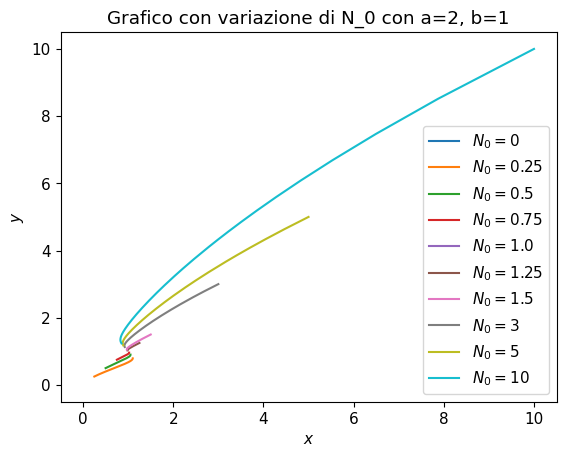

In [148]:
a = 2
b = 1
r = 1

for N_0 in initial_populations:
    # uso Runge Kutta del quarto ordine
    (x_arr, y_arr) = rk4(N_0, N_0, delta_t, n_steps, lambda x, y: fx(x, y, a, b), lambda x, y: fy(x, y))
    plt.plot(x_arr, y_arr, label = r"$N_0 = ${}".format(N_0))

plt.legend()
plt.title(f"Grafico con variazione di N_0 con a={a}, b={b}")
plt.xlabel(r'$ x $')
plt.ylabel(r'$ y $')

Soluzione numerica con a = 1 e b = 2

Text(0, 0.5, '$ y $')

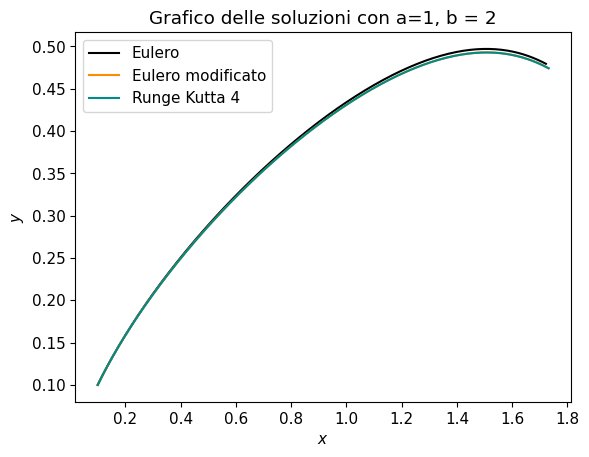

In [139]:
a = 1
b = 2

(x_arr, y_arr) = eulero(x_0, y_0, delta_t, n_steps, lambda x, y: fx(x, y, a, b), lambda x, y: fy(x, y))
plt.plot(x_arr, y_arr, label = "Eulero", c = "k")

(x_arr, y_arr) = eulero_mod(x_0, y_0, delta_t, n_steps, lambda x, y: fx(x, y, a, b), lambda x, y: fy(x, y))
plt.plot(x_arr, y_arr, label = "Eulero modificato", c = "darkorange")

(x_arr, y_arr) = rk4(x_0, y_0, delta_t, n_steps, lambda x, y: fx(x, y, a, b), lambda x, y: fy(x, y))
plt.plot(x_arr, y_arr, label = "Runge Kutta 4", c = "darkcyan")

plt.legend()
plt.title(f"Grafico delle soluzioni con a={a}, b = {b}")
plt.xlabel(r'$ x $')
plt.ylabel(r'$ y $')

Text(0, 0.5, '$ y $')

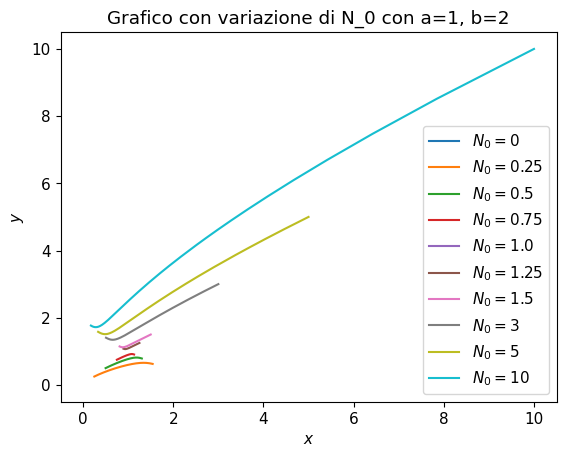

In [140]:
a = 1
b = 2
r = 1

for N_0 in initial_populations:
    # uso Runge Kutta del quarto ordine
    (x_arr, y_arr) = rk4(N_0, N_0, delta_t, n_steps, lambda x, y: fx(x, y, a, b), lambda x, y: fy(x, y))
    plt.plot(x_arr, y_arr, label = r"$N_0 = ${}".format(N_0))

plt.legend()
plt.title(f"Grafico con variazione di N_0 con a={a}, b={b}")
plt.xlabel(r'$ x $')
plt.ylabel(r'$ y $')

Soluzione numerica con a = 1 e b = 3

Text(0, 0.5, '$ y $')

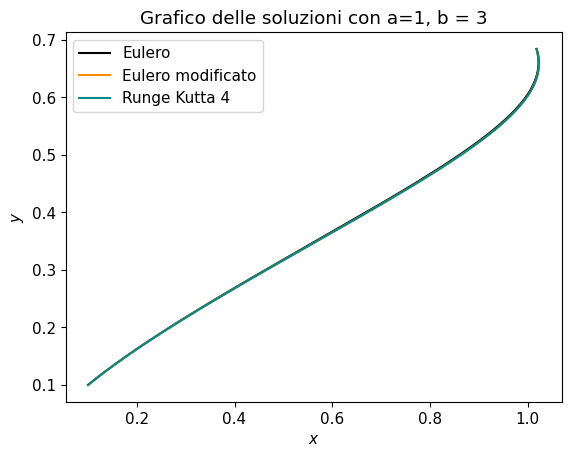

In [141]:
a = 1
b = 3

(x_arr, y_arr) = eulero(x_0, y_0, delta_t, n_steps, lambda x, y: fx(x, y, a, b), lambda x, y: fy(x, y))
plt.plot(x_arr, y_arr, label = "Eulero", c = "k")

(x_arr, y_arr) = eulero_mod(x_0, y_0, delta_t, n_steps, lambda x, y: fx(x, y, a, b), lambda x, y: fy(x, y))
plt.plot(x_arr, y_arr, label = "Eulero modificato", c = "darkorange")

(x_arr, y_arr) = rk4(x_0, y_0, delta_t, n_steps, lambda x, y: fx(x, y, a, b), lambda x, y: fy(x, y))
plt.plot(x_arr, y_arr, label = "Runge Kutta 4", c = "darkcyan")

plt.legend()
plt.title(f"Grafico delle soluzioni con a={a}, b = {b}")
plt.xlabel(r'$ x $')
plt.ylabel(r'$ y $')

Text(0, 0.5, '$ y $')

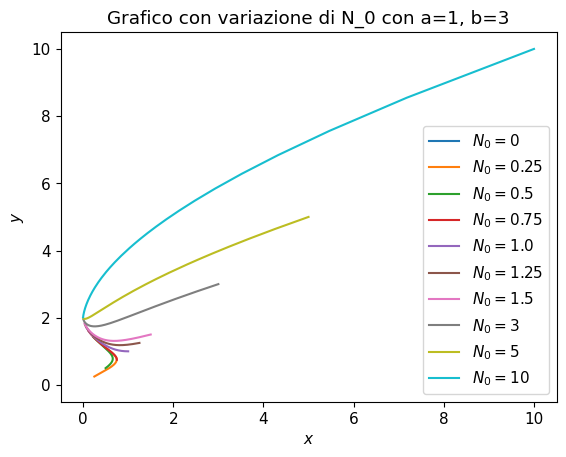

In [143]:
a = 1
b = 3
r = 1

for N_0 in initial_populations:
    # uso Runge Kutta del quarto ordine
    (x_arr, y_arr) = rk4(N_0, N_0, delta_t, n_steps, lambda x, y: fx(x, y, a, b), lambda x, y: fy(x, y))
    plt.plot(x_arr, y_arr, label = r"$N_0 = ${}".format(N_0))

plt.legend()
plt.title(f"Grafico con variazione di N_0 con a={a}, b={b}")
plt.xlabel(r'$ x $')
plt.ylabel(r'$ y $')

Soluzione numerica con a = 3 e b = 1

Text(0, 0.5, '$ y $')

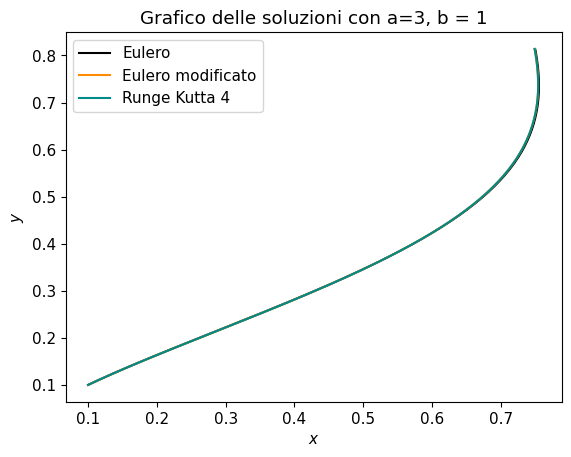

In [144]:
a = 3
b = 1

(x_arr, y_arr) = eulero(x_0, y_0, delta_t, n_steps, lambda x, y: fx(x, y, a, b), lambda x, y: fy(x, y))
plt.plot(x_arr, y_arr, label = "Eulero", c = "k")

(x_arr, y_arr) = eulero_mod(x_0, y_0, delta_t, n_steps, lambda x, y: fx(x, y, a, b), lambda x, y: fy(x, y))
plt.plot(x_arr, y_arr, label = "Eulero modificato", c = "darkorange")

(x_arr, y_arr) = rk4(x_0, y_0, delta_t, n_steps, lambda x, y: fx(x, y, a, b), lambda x, y: fy(x, y))
plt.plot(x_arr, y_arr, label = "Runge Kutta 4", c = "darkcyan")

plt.legend()
plt.title(f"Grafico delle soluzioni con a={a}, b = {b}")
plt.xlabel(r'$ x $')
plt.ylabel(r'$ y $')

Text(0, 0.5, '$ y $')

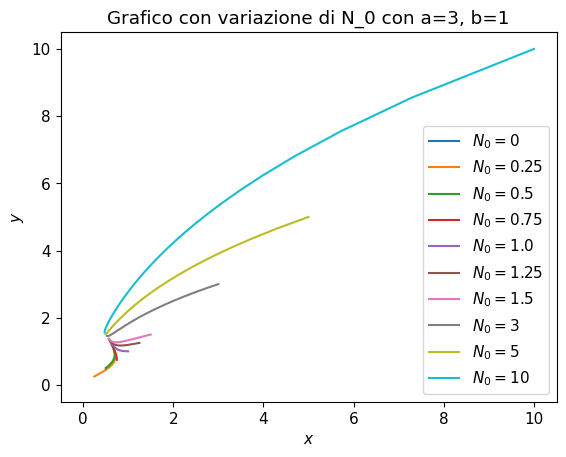

In [145]:
a = 3
b = 1
r = 1

for N_0 in initial_populations:
    # uso Runge Kutta del quarto ordine
    (x_arr, y_arr) = rk4(N_0, N_0, delta_t, n_steps, lambda x, y: fx(x, y, a, b), lambda x, y: fy(x, y))
    plt.plot(x_arr, y_arr, label = r"$N_0 = ${}".format(N_0))

plt.legend()
plt.title(f"Grafico con variazione di N_0 con a={a}, b={b}")
plt.xlabel(r'$ x $')
plt.ylabel(r'$ y $')